# Clustering for Record Data

## Introductions

### Introduction to Clustering Algorithms

This page shows the practice of three different clustering algorithms: k-means, DBSCAN, and hierarchical clustering.

<b style="color:blue">1. K-means</b> 

Kmeans algorithm is the most commonly used algorithm in clustering algorithm, which divides the interval according to the distance of samples. The basic step of the algorithm is to manually select k points as the center point of the sample cluster, calculate the distance from all the sample points to the k center points, and then select the center point that can reach the shortest distance as the classification of new samples, so that each sample is marked once.

The next step is to update the center point. The update rule of the center point is to calculate the intermediate point of each category, then change the intermediate point into a new initial point, and re perform the above operations. In this way, until the distance of each update is less than a threshold, the iteration is ended and the final classification result is determined. 

Finally, it should be noted that the kmeans algorithm needs to first determine a k value and the initial center point. One disadvantage of kmeans algorithm is that the classification result is a convex set, so there is no way to classify various shapes, and normalization must be done before kmeans algorithm. 

<b style="color:blue">2. DBSCAN</b>

Density-based spatial clustering of applications with noise, known as DBSCAN, is also one of the most common clustering algorithms and it is actually most cited in scientific literature. The core idea of DBSCAN is to cluster based on density. It can find the dense regions in the sample points and cluster according to the density. The algorithm mainly designs two parameters, one is the radius of the neighborhood, the other is the minimum number of points. In this algorithm, there are three types of points. The first is the core point, that is, there are more than the minimum number of points in the neighborhood of the point; The second is the boundary point, which is not the core point but located in the neighborhood of a point; The third point is noise point, as long as it is not inferior to the first two points, it is noise point.

The relationship between points can be divided into four types: the first is density congruence, that is, one point is in the neighborhood of another point; The second is that the density can reach, that is, if a core point can be connected with another point density through several core points with the same density, the density of this point and the core point can reach; If two points can be transmitted to each other in the neighborhood, they are said to be connected in density; The fourth is called density incoherent.

The idea of the algorithm is to first select a point as the initial point, and then use the point as the core point to find all the points that can reach the density of the point to form a cluster. Perform the above steps for all points to get a collection of clusters. While traversing, the cluster is classified according to the inclusion relationship of clusters.

<b style="color:blue">3. Hierarchical Clustering</b>

Hierarchical clustering establishes a tree structure. Each layer of the tree is a binary tree structure. In the clustering tree, data points of different categories are the lowest layer of the tree, and the top layer of the tree is a cluster root node. There are two processes for creating a cluster tree: top-down and bottom-up.

The first type is the bottom-up decomposition method, known as Agglomerative. Each point is regarded as a cluster, the nearest two points are combined into a new cluster, and these operations are repeated for each cluster, until the number of classifications meets the requirements, or the distance between two clusters meets the requirements.

The second type is a top-down approach, known as Division. First, all the sample points are considered as a cluster. Next, the farthest point is split into two clusters. Next, the above operations are performed on each cluster until the distance between the two clusters reaches a certain distance or the number of classifications meets the requirements. This method consumes a lot of computing resources and requires more resources to meet the requirements.

### Introduction to Model Selection Methods

<b style="color:blue">1. Elbow Method</b>

For K-means clustering, we usually use inertia, sum of squared distances of samples to their closest cluster center, to measure how well a dataset is clustered by K-means. An ideal model is the one with both low inertia and a low number of clusters (k). Nevertheless, since inertia always decreases as the number k increases, this is actually a tradeoff. In order to find the optimal k, we can then find the elbow point in the inertia-k plot.

<b style="color:blue">2. Silhouette Method</b>

Silhouette is another method for us to select the optimal model. Silhouette analysis is utilized to find the separation distance between the resulting clusters. The silhouette coefficient has a range of [-1,1]. “1” indicates that the sample is far away from the neighboring clusters, while “0” indicates that the sample is very close to the boundary and negative values mean that the samples might be assigned to the wrong cluster.

## Preparation and Data Presentation

**import python packages and read data from csv file**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy as sp

from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.cluster import KMeans
import sklearn.cluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv("travel_mode_choice.csv")

In [ ]:
df.head()

,TTME,INVC,INVT,GC,HINC,PSIZE,choice
0,40,20,345,57,20,1,2
1,45,148,115,160,45,1,1
2,20,19,325,55,26,1,2
3,15,38,255,66,26,1,2
4,20,21,300,54,6,1,2


In [ ]:
df.shape

(151, 7)

This data is aboat people's travel mode choice and it contains 151 lines. There are 3 different travel mode choice in this data: "1" represents for air, "2" for train, and "3" for bus. As for X variables (features), there are 6 variables in total interpreted below:

TTME - terminal waiting time\
INVC - in vehicle cost for all stages\
INVT - travel time (in-vehicle time) for all stages\
GC - generalized cost measure:invc+(invt*value of travel time savings)\
HINC - household income\
PSIZE - traveling group size

The goal of the clustering models is to figure out if the X features can be clustered into several groups. Also, we can compare the clustering results with the original true labels.

First, let's have a look at the distribution of the target variable: choice

In [ ]:
df["choice"].value_counts()

2    63
1    58
3    30
Name: choice, dtype: int64

Seperate the dataset into features and labels

In [ ]:
X=df.loc[:,df.columns!="choice"]
y=df.loc[:,"choice"]

Then I plot the heat map of the correlation matrix to see the relationship among different variables.

            TTME      INVC      INVT        GC      HINC    PSIZE     choice
TTME    1.000000  0.464165 -0.152421  0.309941  0.142177  0.070189 -0.384252
INVC    0.464165  1.000000 -0.429092  0.550372  0.362047 -0.040891 -0.693269
INVT   -0.152421 -0.429092  1.000000  0.484061 -0.241788 -0.045246  0.678051
GC      0.309941  0.550372  0.484061  1.000000  0.131839  0.079697 -0.057761
HINC    0.142177  0.362047 -0.241788  0.131839  1.000000 -0.017023 -0.294000
PSIZE   0.070189 -0.040891 -0.045246  0.079697 -0.017023  1.000000 -0.078319
choice -0.384252 -0.693269  0.678051 -0.057761 -0.294000 -0.078319  1.000000


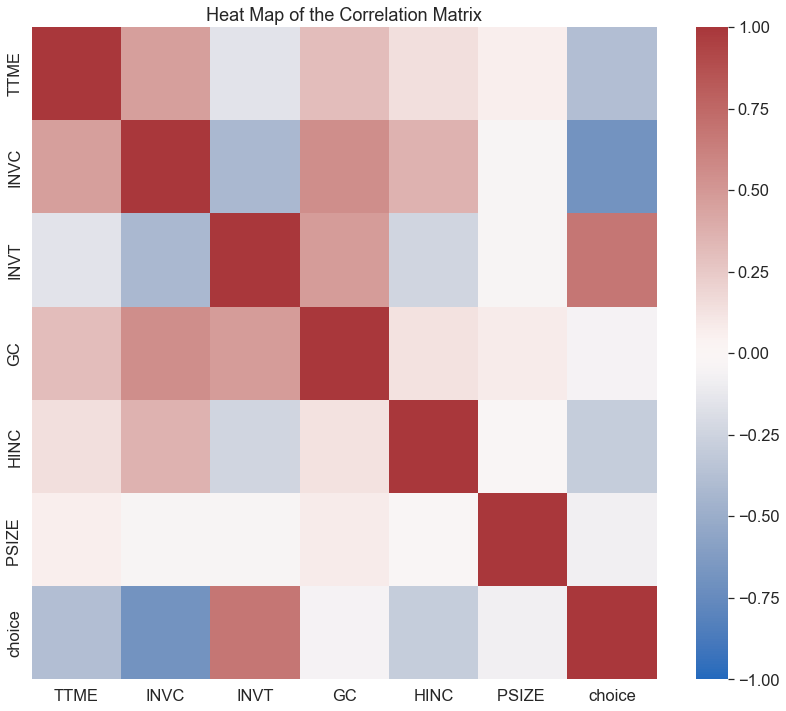

In [ ]:
print(df.corr())
fig,axes = plt.subplots(1, 1, num="stars",figsize=(14, 12))
axes = sns.heatmap(df.corr(), vmin=-1, vmax=1,cmap="vlag")
axes.set_title("Heat Map of the Correlation Matrix", fontsize=18)
#plt.show()
plt.savefig("correlation.png",dpi=200)

Also, have a look at the pair plot

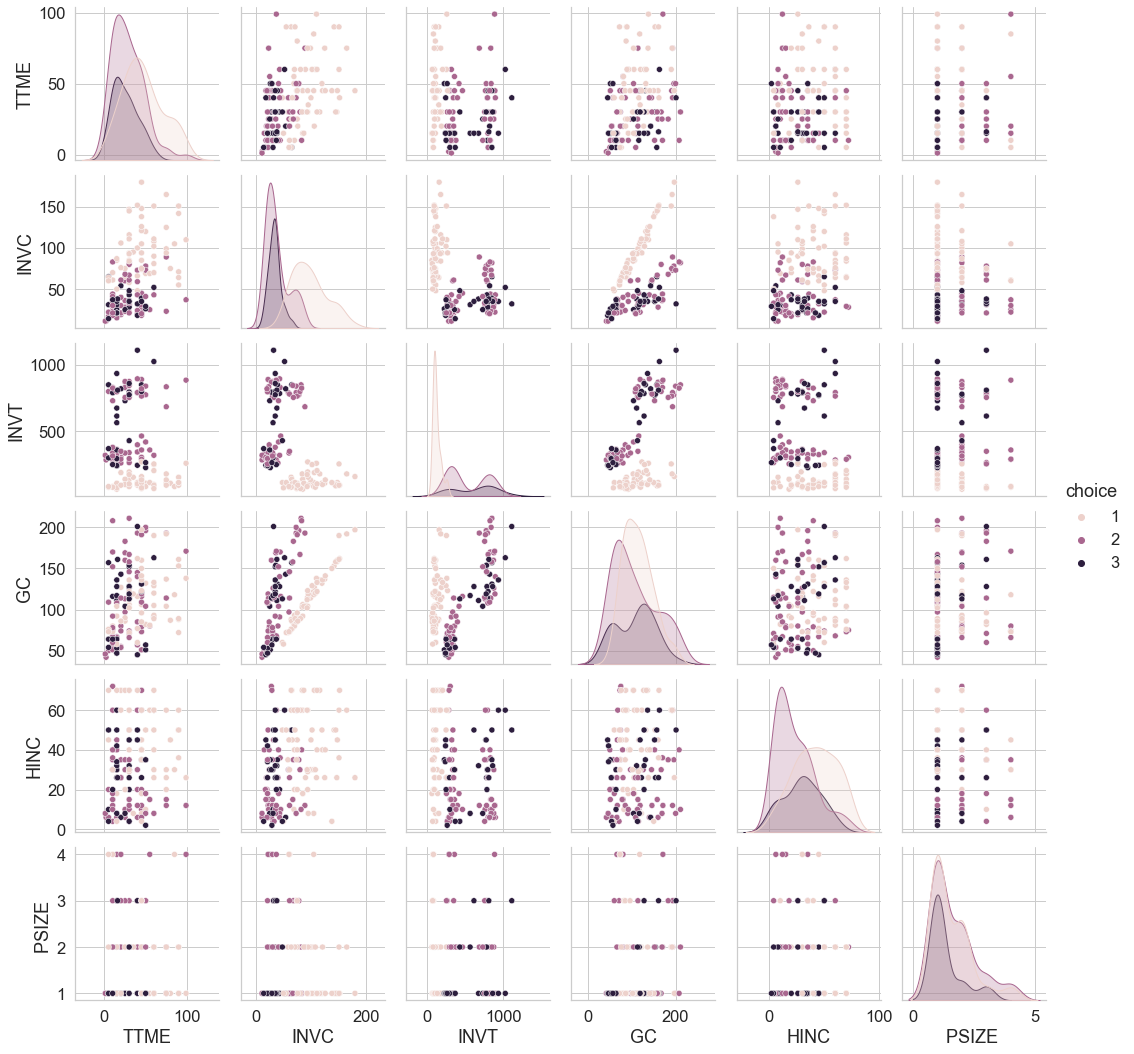

In [ ]:
sns.pairplot(df,hue="choice")
plt.show()

From the visualizations above, variable PSIZE may not be a good feature for further clustering. Thus, remove this variable.

In [ ]:
X=df.iloc[:,0:5]

## Clustering

First, normalize the X features using the StandardScaler function.

In [ ]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
nor_df=pd.DataFrame(scaler.transform(X)).set_axis(X.columns, axis=1)

Have a quick look of data after normalization.

In [ ]:
nor_df.head()

,TTME,INVC,INVT,GC,HINC
0,0.231373,-1.038226,-0.163412,-1.240949,-0.588128
1,0.453056,2.300127,-0.944272,1.189842,0.684913
2,-0.655361,-1.064307,-0.231313,-1.288149,-0.282598
3,-0.877044,-0.568771,-0.468966,-1.028550,-0.282598
4,-0.655361,-1.012146,-0.316189,-1.311749,-1.301031


### 1. K-means

Perform K-means algorithm to do the clustering. In order to select the optimal hyperparameter, I use both silhouette method and elbow method. Silhouette check comes first.

In [ ]:
def kmeans(X,nmax=20,i_plot=False):
    X=np.ascontiguousarray(X) 
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
        labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 
        
        if(sil_scores[-1]>sil_max):
            opt_param=param
            sil_max=sil_scores[-1]
            opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

OPTIMAL PARAMETER = 3


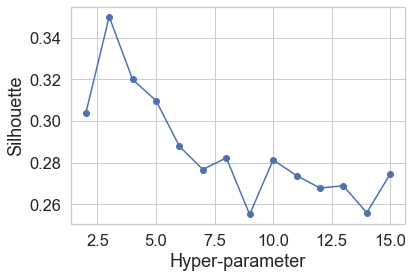

In [ ]:
kmeans_result=kmeans(nor_df,nmax=15, i_plot=True)

From the result above, when cluster number k equals to 3, this model achieve the highest silhouette. 

Then visualize the clustering result. The X data actually contains 5 variables, but in order to visualize the result in a 2-D graph, I only choose the second and third features to plot.

In [ ]:
def plot(X,color_vector):
    fig, ax = plt.subplots()
    ax.scatter(X.iloc[:,1], X.iloc[:,2],c=color_vector, cmap="viridis") #, alpha=0.5) #, c=y
    ax.set(xlabel='Feature-1 (x_2)', ylabel='Feature-2 (x_3)',
    title='Cluster data')
    ax.grid()
    plt.show()


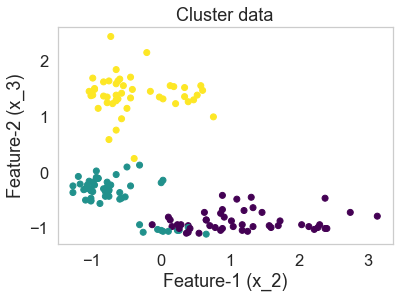

In [ ]:
plot(nor_df,kmeans_result)

It is clear to see that K-means has successfully seperated the data into three distinct groups.

Secondly, use elbow method to double check the optimal model selection.

In [ ]:
cluster = range(1,11)
centroid = []
inertia = []
index = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(nor_df)
    index = kmeans.labels_
    centroid = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_)

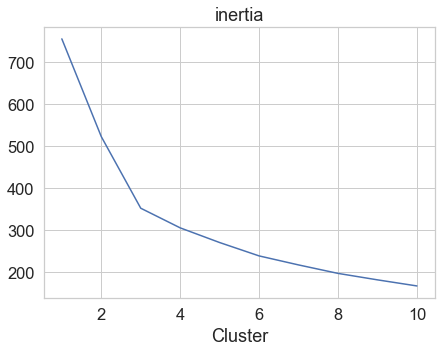

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
sns.set_theme(style="whitegrid",font_scale=1.5)
sns.lineplot(ax=axes, x=cluster, y=inertia)
axes.set_title('inertia')
plt.xlabel('Cluster')
plt.show()

From this inertia-k plot, it is obvious that the elbow appears when k=3. This result is the same as silhouette method.

### 2. DBSCAN

Perform DBSCAN algorithm to do the clustering and use silhouette method to select the optimal hyperparameter.

In [ ]:
def dbscan(X,nmax=20,i_plot=False):
    X=np.ascontiguousarray(X) 
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        param=0.5*(param-1)
        model = sklearn.cluster.DBSCAN(eps=param).fit(X)
        labels=model.labels_
            
        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 
        
        if(sil_scores[-1]>sil_max):
            opt_param=param
            sil_max=sil_scores[-1]
            opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

OPTIMAL PARAMETER = 1.5


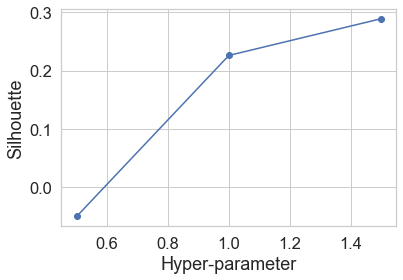

In [ ]:
dbscan_result = dbscan(nor_df,nmax=15,i_plot=True)

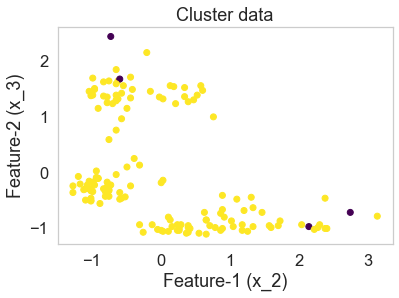

In [ ]:
plot(nor_df,dbscan_result)

The optimal hyperparameter of DBSCAN is 1.5. However, the plot above indicates that the DBSCAN method does not perform as well as K-means.

### 3. Hierarchical (Agglomerative clustering)

Perform Agglomerative clustering algorithm and use silhouette method to select the optimal hyperparameter.

In [ ]:
def hierarchical(X,nmax=20,i_plot=False):
    X=np.ascontiguousarray(X) 
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
        labels=model.labels_
            
        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(sil_scores[-1]>sil_max):
            opt_param=param
            sil_max=sil_scores[-1]
            opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

OPTIMAL PARAMETER = 3


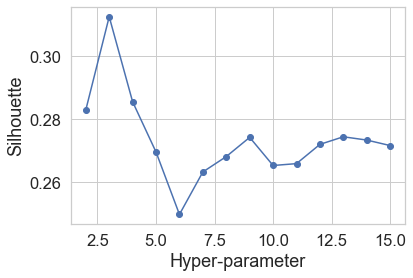

In [ ]:
ag_result=hierarchical(nor_df,nmax=15, i_plot=True)

From the result above, when cluster number n equals to 3, this model achieve the highest silhouette.

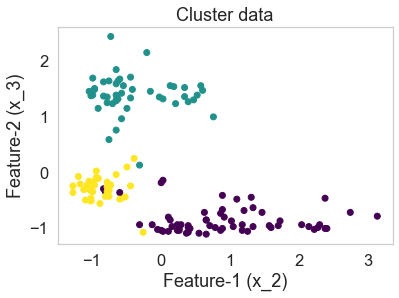

In [ ]:
plot(nor_df,ag_result)

Similar to K-means, this plot shows that Agglomerative has successfully seperated X data into three groups.

Have a look at the dendrogram of the agglomerative clustering result.

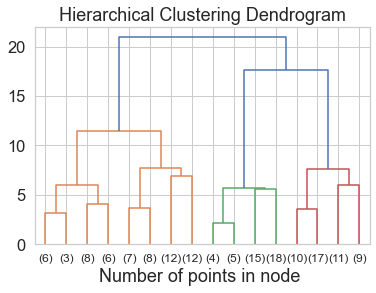

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(nor_df)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node ")
plt.show()

This also shows that clustering the data into three groups makes sense.

### Final results

Since we have already used silhouette method or elbow method to seek for the optimal parameter, now run the K-means and Agglomerative model with these parameters.

**K-means:**

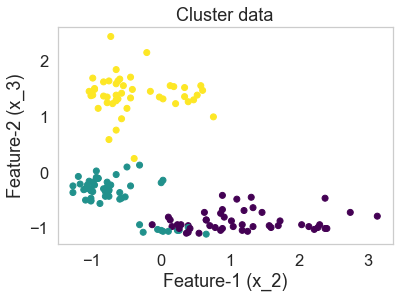

In [ ]:
model = sklearn.cluster.KMeans(n_clusters=3).fit(nor_df)
labels=model.predict(nor_df)
plot(nor_df,labels)

**Agglomerative:**

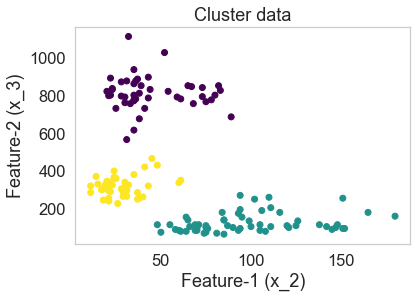

In [ ]:
model = sklearn.cluster.AgglomerativeClustering(n_clusters=3).fit(X)
labels=model.labels_
plot(X,labels)

## Result Discussion

From the Clustering part, we can see that K-means and Agglomerative perform well and successfully seperated the data into three groups. However, DBSCAN do not output as good result as other two methods. Possible reason is that the method based on density does not work well on this given dataset. 

There is still a valuable question to discuss: whether the three clusters output by the algorithms coincide with the true labels?

Plot the data with true labels using same features (x_2 and x_3):

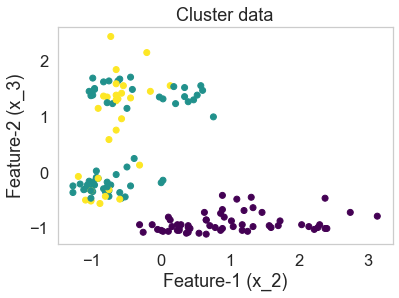

In [ ]:
plot(nor_df,y)

To our surprise, the true data is not distributed as expected. Some data point seems to have "wrong" label.

Check the difference between true labels and predicted labels with confusion matrix.

In [ ]:
y=y.replace(1,0)
y=y.replace(2,1)
y=y.replace(3,2)


In [ ]:
def confusion_plot(y_data,y_pred):
    print("ACCURACY:",sum(y_pred==y_data)/len(y_data))
    con_matrix=confusion_matrix(y_data,y_pred)
    print(con_matrix)
    disp=ConfusionMatrixDisplay(confusion_matrix=con_matrix)
    disp.plot()
    plt.show()

ACCURACY: 0.6225165562913907
[[57  0  1]
 [ 5 27 31]
 [ 0 20 10]]


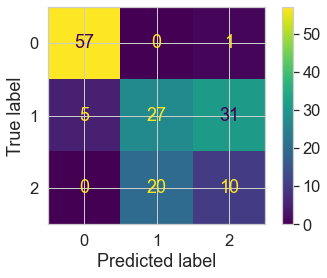

In [ ]:
confusion_plot(y,ag_result)

The comparation result above shows that using Agglomerative algorithm to predict the label reaches an accuracy of 0.62. 

## Conclusions

In general, clustering on this travel mode dataset provides us with valuable information. 

First, we can see that the clustering methods can successfully seperate the data into three groups. However, the groups predicted by algorithms do not coincide with the true label perfectly.

The inconsistency of clustering result and the true labels can be interpreted as follows. First, the true labels represents for three different choice of travel mode: air, bus and train. These people's travel data may also includes some hidden pattern other than travel mode choice. For instance, perhaps these three clusters acquired by algorithms represent for passengers with different types, partitioned by a feature that does not exist in the dataset, like age or occupation.